# Data Wrangling: Geographic Segmentation

###  This dataset contains sales history from Caring Transitions of Southern Arizona Ctbids online auction platform from July 2024 through end of December 2024. The goal is to better understand who our customer base is, where they are located, what percent of them are utilizing shipping and what trends can we find to market to them better.

### Column Explanation:
- **Customer ID:** Anonymous id for winning customers personal information
- **Item Name:** Title of the listing (can contain multplie items)
- **Type:** Onsite or Auction, all should be marked auction otherwise it is an error
- **Sku:** System for employee who created the lot and location/inventory number of the lot
- **Category Name:** Employee choosen category for item name
- **Invoice Number:** Unique auto-generated number assigned to each item once the sale has closed
- **Invoice Status:** Paid or Unpaid (none indicates item was not bid on)
- **Add On Invoice Number:** If an additional invoice was added like shipping
- **Add On Invoice Status:** Paid or Unpaid of add on invoice
- **Item Receipt Method:** The method that the customer wants the item, either shipping, delivery, or local pick-up
- **Item ID:**
- **Winner First Name:** Winning customers first name
- **Zip:** Winning customers associated zip code
- **Buyers Premium:** 18% of winning bid price added on to the invoice
- **Tax Buyers Premium:** tax added to buyers premium, 0 for this caring transitions location
- **Status:** Sold or Unsold (unsold would infer no bids where placed on that listing)
- **Sale Title:** Title of the sale the listing belongs to
- **Sale Start Date:** Date that the sale went live
- **Sale End Date:** Date that the sale ends
- **Item Close Time:** Time that listing officially ended
- **Reserve Price:** If the item has a reserve amount it would be put here
- **Number of Views:** Number of views that listing has received while live
- **Sale Price:** The final price the listing ended at
- **Tax:** 8.7% of sales price added on for Arizona state sales tax
- **Number of Bids:** Total number of bids placed on item
- **Taxexempt:** If the winning bidder was tax-exempt
- **Item Link:** Link with photos to the listing
- **Item Shippable:** If the item ships, for this storefront all items are shippable

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading in the data
saleshist = pd.read_csv('cleaned_saleshistory.csv')

In [6]:
saleshist.shape

(8153, 27)

In [7]:
saleshist.head()

,Customer ID,Item Name,Type,SKU,Category Name,Invoice Number,Invoice Status,Add On Invoice Number,Add On Invoice Status,Item Receipt Method,...,Sale End Date,Item Close Time,Reserve Price,Number of Views,Sale Price,Tax,Number of Bids,Taxexempt,Item Link,Item Shippable
0,1,2 Box Cloth And Fabric Mystery Lot #1,Auction,SBE4712T2,Mystery Lots,3.002387e+09,Paid,NaN,NaN,pickup,...,07/22/2024 06:30 PM MST,07/22/2024 07:04:00 PM MST,0.0,68,15.27,1.33,9.0,No,https://ctbids.com/estate-sale/30023/item/3301432,Yes
1,2,"American Flag Tapestry, ESPN Football, Pop Wa...",Auction,DTE5014SW,Sports Memorabilia,3.153441e+11,Paid,NaN,NaN,pickup,...,09/30/2024 06:30 PM MST,09/30/2024 06:59:00 PM MST,0.0,30,3.00,0.00,3.0,No,https://ctbids.com/estate-sale/31534/item/3501414,Yes
2,3,Ashley Dining Room Table,Auction,K1722,Tables,3.010551e+10,Paid,NaN,NaN,pickup,...,07/23/2024 06:30 PM MST,07/23/2024 06:40:00 PM MST,0.0,97,52.00,4.52,19.0,No,https://ctbids.com/estate-sale/30105/item/3301548,Yes
3,4,Beautiful wall art,Auction,LVW4606AC,Art Other,3.017369e+10,Paid,NaN,NaN,pickup,...,07/29/2024 06:30 PM MST,07/29/2024 06:33:00 PM MST,0.0,36,3.00,0.26,3.0,No,https://ctbids.com/estate-sale/30173/item/3317953,Yes
4,4,C Jaffey Original Oil Painting of Cottage Lan...,Auction,CCO4514AC5,Paintings,3.121569e+10,Paid,NaN,NaN,pickup,...,09/16/2024 06:30 PM MST,09/16/2024 07:29:00 PM MST,0.0,25,9.88,0.86,10.0,No,https://ctbids.com/estate-sale/31215/item/3453069,Yes


In [8]:
saleshist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            8153 non-null   int64  
 1   Item Name              8153 non-null   object 
 2   Type                   8153 non-null   object 
 3   SKU                    8153 non-null   object 
 4   Category Name          8153 non-null   object 
 5   Invoice Number         8017 non-null   float64
 6   Invoice Status         8017 non-null   object 
 7   Add On Invoice Number  1704 non-null   float64
 8   Add On Invoice Status  1704 non-null   object 
 9   Item Receipt Method    8017 non-null   object 
 10  Item ID                8153 non-null   int64  
 11  Zip                    8017 non-null   float64
 12  Buyers Premium         8153 non-null   float64
 13  Tax Buyers Premium     8153 non-null   int64  
 14  Status                 8153 non-null   object 
 15  Sale

### Cleaning & Identifying Missing Values

#### Removing columns that are not useful to this particular storefront

In [11]:
saleshist.drop(['Type', 'Add On Invoice Number', 'Add On Invoice Status', 'Item ID', 'Tax Buyers Premium', 'Item Close Time', 'Item Shippable'], axis=1, inplace=True)

In [12]:
saleshist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          8153 non-null   int64  
 1   Item Name            8153 non-null   object 
 2   SKU                  8153 non-null   object 
 3   Category Name        8153 non-null   object 
 4   Invoice Number       8017 non-null   float64
 5   Invoice Status       8017 non-null   object 
 6   Item Receipt Method  8017 non-null   object 
 7   Zip                  8017 non-null   float64
 8   Buyers Premium       8153 non-null   float64
 9   Status               8153 non-null   object 
 10  Sale Title           8153 non-null   object 
 11  Sale Start Date      8153 non-null   object 
 12  Sale End Date        8153 non-null   object 
 13  Reserve Price        8153 non-null   float64
 14  Number of Views      8153 non-null   int64  
 15  Sale Price           8153 non-null   f

Item Receipt Method will be an important column for us later so for ease of use I am going to abbreviate this column name

In [14]:
saleshist = saleshist.rename(columns={'Item Receipt Method': 'IRM'})

#### Data types & Missing Values

In [16]:
# Checking for total missing data
missing_count = saleshist.isnull().sum()
missing_count

Customer ID          0
Item Name            0
SKU                  0
Category Name        0
Invoice Number     136
Invoice Status     136
IRM                136
Zip                136
Buyers Premium       0
Status               0
Sale Title           0
Sale Start Date      0
Sale End Date        0
Reserve Price        0
Number of Views      0
Sale Price           0
Tax                  0
Number of Bids      27
Taxexempt            0
Item Link            0
dtype: int64

**Since the majority of our missing values are consistent with Invoice Number & Status that automatically indicates that these missing values are for items that where not bid on (that would be the 27 missing Number of Bids), item names that are pending, or did not meet the reserve price set.**

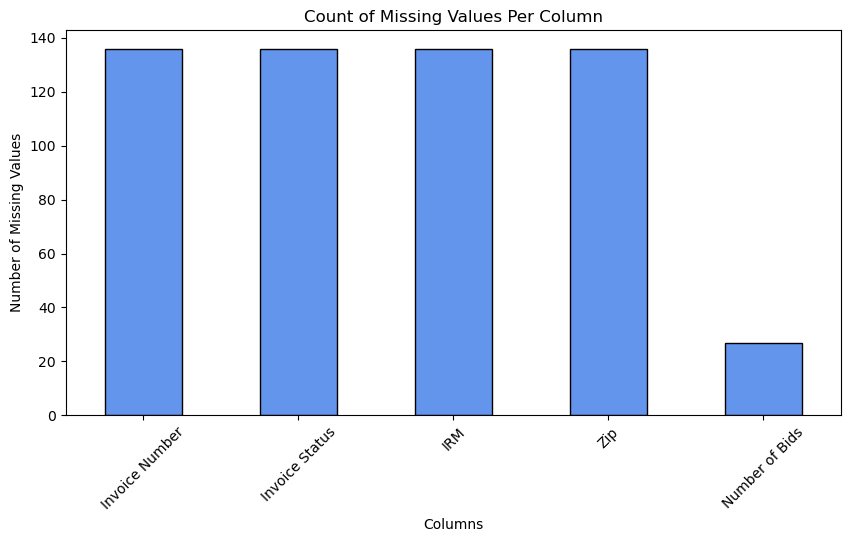

In [18]:
# Filter only columns with missing values
missing_count = missing_count[missing_count > 0]  

# Visualizing the missing data using a heatmap
plt.figure(figsize=(10, 5))
missing_count.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("Count of Missing Values Per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()

#### Missing Values: Analyzing Reserve Price in relation to Invoice Numbers

In [20]:
missing_invoicenum = saleshist[saleshist['Invoice Number'].isnull()]
missing_invoicenum

,Customer ID,Item Name,SKU,Category Name,Invoice Number,Invoice Status,IRM,Zip,Buyers Premium,Status,Sale Title,Sale Start Date,Sale End Date,Reserve Price,Number of Views,Sale Price,Tax,Number of Bids,Taxexempt,Item Link
24,23,"""Istanbul Throw"" Blanket And More",DTE4719E,Bedroom Goods,NaN,NaN,NaN,NaN,0.0,Not Sold,CTBIDS WH Online Auction | JULY VOL. 3 | Ends:...,07/10/2024 05:30 PM MST,07/15/2024 12:00 AM MST,0.0,90,0.0,0.0,13.0,No,https://ctbids.com/estate-sale/29865/item/3286218
44,23,(UPDATED) 9-foot Life Size Bronze Sculpture “E...,BY1832,Sculpture,NaN,NaN,NaN,NaN,0.0,Not Sold,CTBIDS In-Home Online Auction I CONESTOGA AVE ...,08/08/2024 05:30 PM MST,08/13/2024 06:30 PM MST,5000.0,311,0.0,0.0,9.0,No,https://ctbids.com/estate-sale/30529/item/3362096
45,23,(UPDATED) Bronze “Life Size” Sculpture Of Don...,BY1831,Sculpture,NaN,NaN,NaN,NaN,0.0,Not Sold,CTBIDS In-Home Online Auction I CONESTOGA AVE ...,08/08/2024 05:30 PM MST,08/13/2024 06:30 PM MST,2500.0,213,0.0,0.0,3.0,No,https://ctbids.com/estate-sale/30529/item/3361240
46,23,*Do not list* CASH & CARRY Chairs,CC2800,Chairs,NaN,NaN,NaN,NaN,0.0,Pending,CTBIDS In-Home Online Auction I SQUAWBUSH COUR...,09/05/2024 05:30 PM MST,09/10/2024 06:30 PM MST,0.0,0,0.0,0.0,NaN,No,https://ctbids.com/estate-sale/31123/item/3437702
47,23,*Do not list* Oran And Grubb Storage Or Entert...,GR1815,Bedroom,NaN,NaN,NaN,NaN,0.0,Pending,CTBIDS In-Home Online Auction I SQUAWBUSH COUR...,09/05/2024 05:30 PM MST,09/10/2024 06:30 PM MST,0.0,0,0.0,0.0,NaN,No,https://ctbids.com/estate-sale/31123/item/3446157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,23,Schafer & Sons VS-40 Upright Piano,LR2804,Keyboards & Pianos,NaN,NaN,NaN,NaN,0.0,Not Sold,CTBIDS In-Home Online Auction I LAVA FALLS I E...,11/28/2024 05:30 PM MST,12/03/2024 06:30 PM MST,0.0,73,0.0,0.0,NaN,No,https://ctbids.com/estate-sale/32908/item/3663175
6878,23,Signed “Sunset” Watercolor By Wilson,MB1802,Watercolor,NaN,NaN,NaN,NaN,0.0,Not Sold,CTBIDS In-Home Online Auction I CANADA VISTA I...,10/31/2024 05:30 PM MST,11/05/2024 06:30 PM MST,0.0,23,0.0,0.0,NaN,No,https://ctbids.com/estate-sale/32373/item/3594825
7038,23,Southwestern Style Sofa,LR2821,Sofas,NaN,NaN,NaN,NaN,0.0,Not Sold,CTBIDS In-Home Online Auction I COPPER SPRING ...,11/21/2024 05:30 PM MST,11/26/2024 06:30 PM MST,0.0,25,0.0,0.0,NaN,No,https://ctbids.com/estate-sale/32770/item/3649447
7458,23,Two Framed Pictures of French Influence,MJY5004PW,Prints,NaN,NaN,NaN,NaN,0.0,Not Sold,CTBIDS WH Online Auction | DECEMBER VOL 1 | En...,11/27/2024 05:30 PM MST,12/02/2024 06:30 PM MST,0.0,9,0.0,0.0,NaN,No,https://ctbids.com/estate-sale/32834/item/3658685


In [21]:
missing_invoicenum['Reserve Price'].unique()

array([   0., 5000., 2500.])

**Only three unique values of missing invoice numbers with a reserve price, meaning only two of the item listings had reserves that were not sold. There are also some rows classified as not sold with no reserve. Before I remove those I am going to analyze Status=Pending further.**

#### Missing Values: Further look into Status & Invoice Status

In [24]:
print(saleshist['Status'].value_counts())
print(saleshist['Invoice Status'].value_counts())

Status
Sold        8017
Not Sold     122
Pending       14
Name: count, dtype: int64
Invoice Status
Paid      7979
Unpaid      38
Name: count, dtype: int64


**Not Sold & Pending equal our 136 NaN values. Pending representing that the items never went live. The combination of both Paid and Unpaid invoices equal our total amount of sold invoices.Therefore I am going to proceed with removing the NaN values**

#### Removing Columns with NaN Values

In [27]:
nan_cols = [
    'Invoice Number',
    'Invoice Status',
    'IRM',
    'Zip'
    
]

# Seperating NaN values into a new DataFrame and this info may be import to have for productivity purposes
nan_data = saleshist[saleshist[nan_cols].isnull().any(axis=1)]

# Keeping rows without Nan in the orginial df
saleshist = saleshist.dropna(subset=nan_cols)

In [28]:
# Checking for total missing data
missing_count = saleshist.isnull().sum()
missing_count

Customer ID        0
Item Name          0
SKU                0
Category Name      0
Invoice Number     0
Invoice Status     0
IRM                0
Zip                0
Buyers Premium     0
Status             0
Sale Title         0
Sale Start Date    0
Sale End Date      0
Reserve Price      0
Number of Views    0
Sale Price         0
Tax                0
Number of Bids     0
Taxexempt          0
Item Link          0
dtype: int64

**Dtypes:** 
- Category: depending on how many values we have in that field it likley makes sense to change that to a category 
- Invoice Number: does not contain decimals and would save space if this is converted into a int
- Invoice Status: is only two variables paid or unpaid so this would be best as a category 
- Item Receipt Method: can only be one of three options, best as a category
- Zip: US zip code which is only whole numbers best as int
- Status: either sold, not sold, or pending, best as category
- Sale Start Date: best as a datetime
- Sale End Date: best as a datetime
- Number of Bids: whole number, best as int
- Taxexempt: either yes or no, best as a bool

In [30]:
saleshist['Category Name'].unique()

array(['Mystery Lots', 'Sports Memorabilia', 'Tables', 'Art Other',
       'Paintings', 'Collectibles Other', 'Chest Of Drawers',
       'Household Goods Other', 'Rings', 'Antiques Other',
       'Costume Jewelry', 'Clothing Other', 'Artful Pottery',
       'Figures & Figurines', 'Prints', 'Bedroom Goods', 'Hand Crafted',
       'Sculpture', 'Games & Toys', 'Asian Art', 'Native American Art',
       'Storage & Organization', 'Cabinets', 'Chairs', 'Fine Jewelry',
       'Hardback', 'Jewelry Other', 'Necklaces', 'Lawn & Landscape',
       'Vintage', 'Antique & Vintage', 'Kitchen & Home', 'Model Cars',
       'Furniture', 'Coins', 'Advertising', 'Sporting Goods Other',
       'Furniture Other', 'Comics', 'Sterling Silver', 'Cars', 'Storage',
       'Patio & Deck', 'Decor', 'China Sets', 'TVs', 'Records & CDs',
       'Patio Furniture', 'Home Video', 'Barware & Breweriana', 'Clocks',
       'Building Materials', 'Decorative Collectibles', 'Film', 'Office',
       'Magazines & Newspapers', 

There are quite a few categories although I still believe it would be best to convert this dtype to categories for efficiency and memory. This is not a column that will receive additions and it will be beneficial for recognizing patterns and purchasing trends

In [32]:
# Before conversion
print(saleshist['Category Name'].memory_usage(deep=True))

# Convert to category
saleshist['Category Name'] = saleshist['Category Name'].astype('category')

# After conversion
print(saleshist['Category Name'].memory_usage(deep=True))

555463
93299


In [33]:
saleshist['Invoice Number'] = saleshist['Invoice Number'].astype('int')
saleshist['Invoice Status'] = saleshist['Invoice Status'].astype('category')
saleshist['IRM'] = saleshist['IRM'].astype('category')
saleshist['Zip'] = saleshist['Zip'].astype('int')
saleshist['Status'] = saleshist['Status'].astype('category')
saleshist['Sale Start Date'] =  pd.to_datetime(saleshist['Sale Start Date'], format='%m/%d/%Y %I:%M %p %Z', errors='coerce')
saleshist['Sale End Date'] = pd.to_datetime(saleshist['Sale End Date'], format='%m/%d/%Y %I:%M %p %Z', errors='coerce')
saleshist['Number of Bids'] = saleshist['Number of Bids'].astype('int')
saleshist['Taxexempt'] = saleshist['Taxexempt'].astype('bool')

In [34]:
saleshist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8017 entries, 0 to 8152
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   Customer ID      8017 non-null   int64                    
 1   Item Name        8017 non-null   object                   
 2   SKU              8017 non-null   object                   
 3   Category Name    8017 non-null   category                 
 4   Invoice Number   8017 non-null   int64                    
 5   Invoice Status   8017 non-null   category                 
 6   IRM              8017 non-null   category                 
 7   Zip              8017 non-null   int64                    
 8   Buyers Premium   8017 non-null   float64                  
 9   Status           8017 non-null   category                 
 10  Sale Title       8017 non-null   object                   
 11  Sale Start Date  8017 non-null   datetime64[ns, UTC-07:00]
 1

#### Checking for duplicates

In [36]:
saleshist.duplicated().sum()

0

Excellent no duplicates

#### Looking for outliers

In [39]:
# Filtering numeric columns
numerical_cols = saleshist.select_dtypes(include=['float64', 'int64']).columns

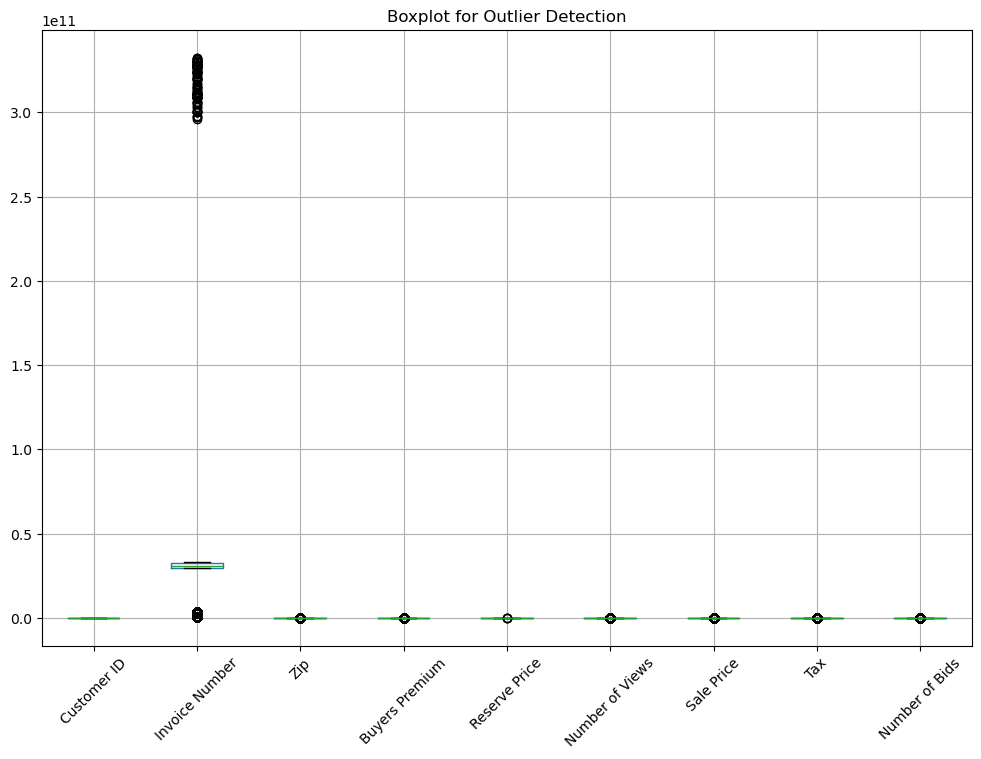

In [40]:
# Visualizing outliers for numeric columns using a boxplot
plt.figure(figsize=(12, 8))
saleshist[numerical_cols].boxplot(rot=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

**It is okay to have outliers in invoice numbers as they are computationally generated for the entire Ctbids online auction platform. Therefore looks like we have no outliers we need to handle.**

#### Making sure digits in Zip only include a total of 5 digits

In [43]:
# Converting Zip column to a str to do check
saleshist['Zip'] = saleshist['Zip'].astype(str)

invalid_zips = saleshist[~saleshist['Zip'].str.match(r'^\d{5}$')]
print(f"Number of Invalid Zip Codes: {len(invalid_zips)}")
print(invalid_zips[['Zip']])

Number of Invalid Zip Codes: 51
         Zip
67      2346
272     2905
295     2132
436   857186
482     3820
708     2151
725   857186
801     1603
1256    1890
1705    4572
1729    7016
1774    1453
1813  857186
1866    2703
2092    2360
2283  857186
2326    3820
2471  857186
2622  857186
2719    2346
2937    1230
2983  857186
3100  857186
3246    3820
3247    3820
3306    3820
3307    3820
3356    4579
3454  857186
3662  857186
3697    3820
3903    8701
3905    4105
4255    4105
4459    7079
4552    4105
4672    7064
4756    4032
4826    1340
4970    2145
6164    4105
6355    7064
6743    1864
7050    4009
7094    3865
7240    6019
7404    4009
7526    4009
7667    4579
7805    1609
7844    4101


**Out of the 51 invalid zip codes, I know that 857186 is a elongation of 85718. I will go ahead and fix those, as for all others I am going to remove them since they are invalid and I am unable to determine what was intended.**

In [45]:
# Updating 857186 to 85718
saleshist.loc[saleshist['Zip'] == '857186', 'Zip'] = '85718'

In [46]:
# Removing invalid zip codes
saleshist = saleshist[saleshist['Zip'].str.match(r'^\d{5}$')] 

In [47]:
# Converting zip back to an int
saleshist['Zip'] = saleshist['Zip'].astype(int)

#### Lastly I am going to safe Pickle this file for upcoming EDA

In [49]:
saleshist.to_pickle("saleshist.pkl")